<a href="https://colab.research.google.com/github/Aditisharma92001/Customer-Segementation/blob/main/Code/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette('Paired')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [ ]:
# changing the names of columns for the sake of convenience
df.rename(columns={'CustomerID':'id','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [ ]:
#LabelEncoder
#Male-1, Female=0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender']=le.fit_transform(df.Gender)

In [ ]:
df.head()

,id,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.describe()

,id,Gender,Age,income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      200 non-null    int64
 1   Gender  200 non-null    int32
 2   Age     200 non-null    int64
 3   income  200 non-null    int64
 4   score   200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [ ]:
#checking for null value
df.isnull().any()

id        False
Gender    False
Age       False
income    False
score     False
dtype: bool

# Data Analysis

([<matplotlib.patches.Wedge at 0x2a781a65f70>,
 [Text(0.2061194541375137, 1.080515974257694, 'Male'),
  Text(-0.20611945413751406, -1.080515974257694, 'Female')],
 [Text(0.11242879316591656, 0.5893723495951058, '44%'),
  Text(-0.11242879316591675, -0.5893723495951056, '56%')])

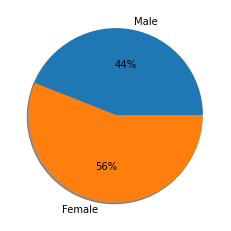

In [ ]:
#Pie plot

m,f = df.Gender.value_counts()[1],df.Gender.value_counts()[0]
sex=[m,f]
lab=["Male","Female"]
plt.pie(sex, labels=lab, shadow=True, autopct='%1.0f%%')

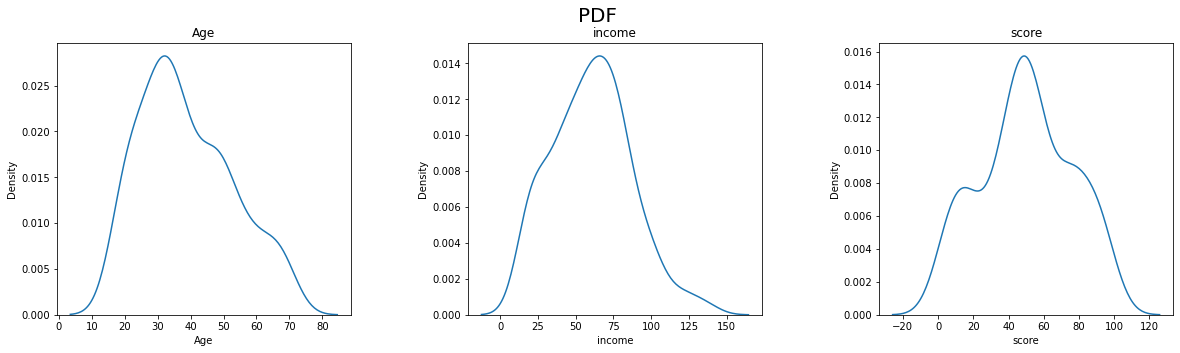

In [ ]:
# Probability Distribution function
fig=plt.figure()
plt.suptitle("PDF",fontsize=20)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(2,len(df.columns)):
    ax=fig.add_subplot(1,3,i-1)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    sns.distplot(df[str(df.columns[i])],hist=False)
    ax.title.set_text(df.columns[i])

plt.show()

<Figure size 432x288 with 0 Axes>

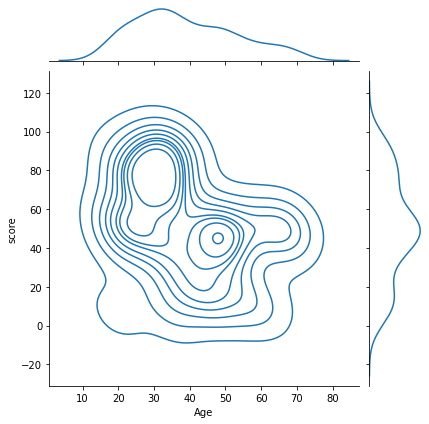

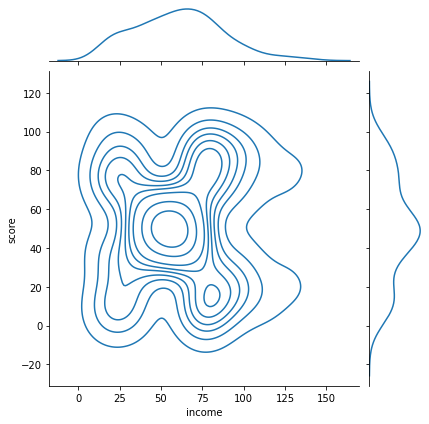

In [ ]:
# Jointplot
fig = plt.figure()

for i in range(2,len(df.columns)-1):
    sns.jointplot(df[str(df.columns[i])], 'score', df, kind="kde")

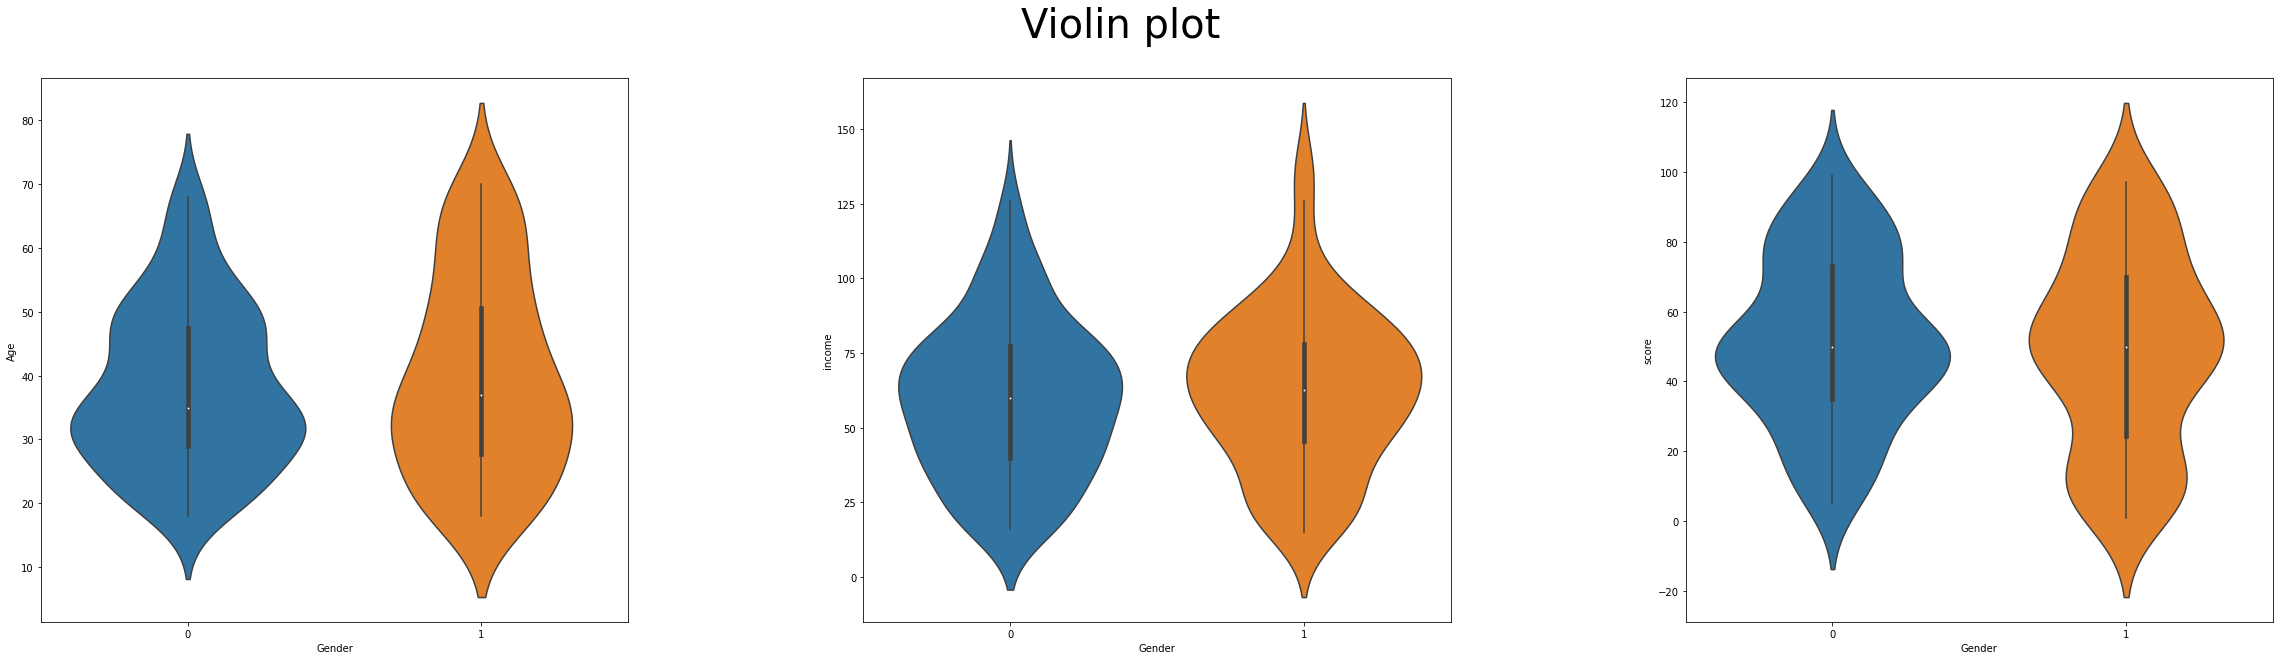

In [ ]:
#violin plot
fig = plt.figure()
fig.suptitle("Violin plot",fontsize=40)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
col = ['Age','income','score']
for i in range(len(col)):
    ax=fig.add_subplot(1,3,i+1)
    fig.set_figheight(10)
    fig.set_figwidth(40)
    sns.violinplot(x='Gender', y=col[i], data=df)

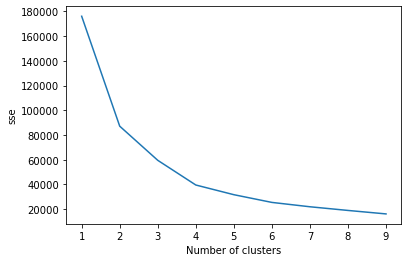

In [ ]:
# Finding appropriate number of clusters

from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Gender','income']])
    sse.append(km.inertia_)
 
plt.xlabel("Number of clusters")
plt.ylabel("sse")
plt.show(plt.plot(k_rng,sse))


In [ ]:
km = KMeans(n_clusters=4)
km.fit(df[['Age','Gender','income']])
centers = km.cluster_centers_
labels = km.labels_

In [ ]:
!pip install plotly

In [ ]:
import plotly 
import plotly.graph_objs as go
import plotly.offline as py_of
py_of.offline.init_notebook_mode(connected=True)

df['labels3'] = labels
trace=go.Scatter3d(
    x=df['Age'],
    y=df['score'],
    z=df['income'],marker = dict(
        color = df['labels3'],
        size = 20, 
    )
)

df2 = [trace]
layout = go.Layout(
    title='Clusters', 
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Score'),
        zaxis = dict(title='income')
    )
)

layout.autosize = True
fig = go.Figure(data = df2, layout = layout)
py_of.iplot(fig)

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Age','Gender','income']], df['score'],train_size=0.7)

In [ ]:
# model fitting
data_temp = df.iloc[:, [2,4]]
km = KMeans(n_clusters=4)
km.fit(data_temp)
centers = km.cluster_centers_
labels = km.labels_


<AxesSubplot:xlabel='score', ylabel='Age'>

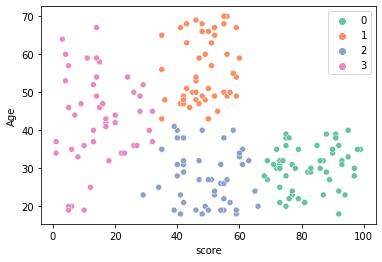

In [ ]:
 sns.scatterplot(x ='score', y ='Age', hue = labels, data = data_temp, palette = 'Set2')

# Conclusion

In [ ]:
# We conclude that the people within orange clusters have higher spending score.
# so, one should focus on that group more in order to increase the profit.